# 相关系数
皮尔逊pearson相关系数和斯皮尔曼spearman等级相关系数。  
它们可用来衡量两个变量之间的相关性的大小

## 总体Pearson相关系数


### 总体数据与样本数据
**1. 总体：所要考察对象的全部个体叫做总体**  
(我国10年进行一次的人口普查得到的数据就是总体数据)  
**2. 样本：从总体中所抽取的一部分个体叫做总体的一个样本**  
(在QQ群发问卷叫同学帮忙填写得到的数据就是样本数据)  
+ ps：我们总希望得到总体数据的一些特征，例如均值和方差等，但是我们所接触到的数据多数是样本数据，所以我们需要使用样本的统计量来估计总体的统计量
+ 例如使用样本均值、样本标准差来估计总体的均值（平均水平）和总体的标准差（偏离程度）。



### 均值、方差、协方差
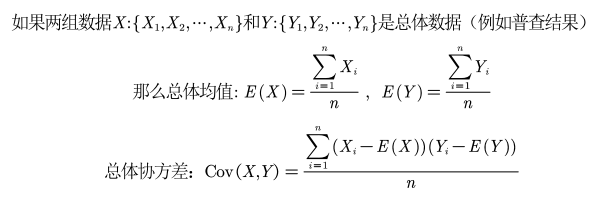

+ **理解协方差:**
1. 如果X,Y变化方向相同，则乘积为正 -> 协方差为正
2. 如果X,Y变化方向相反，则乘积为负 -> 协方差为负
3. 如果X、Y变化方向之间相互无规律，即分子中有的项为正，有的项为负，那么累加后正负抵消
4. 协方差理论上也可以体现两个变量相关性的大小，但是协方差的大小和两个变量的量纲有关，因此不适合作比较  
**皮尔逊相关系数便可以看做成消除了两个变量量纲的影响，即将X、Y标准化后的协方差**

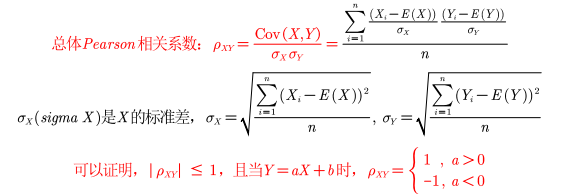

## 样本Pearson相关系数
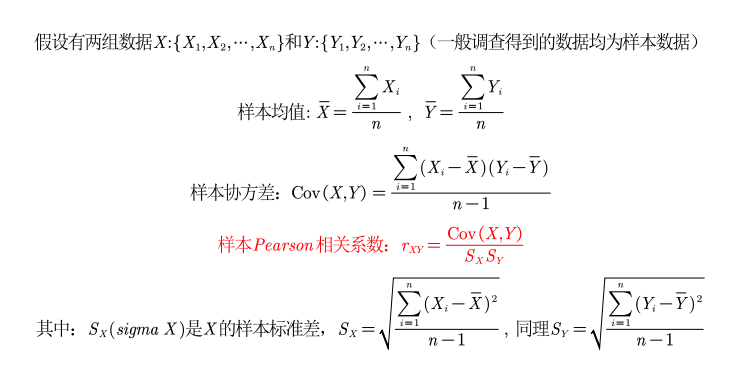

## Pearson系数的几个误区
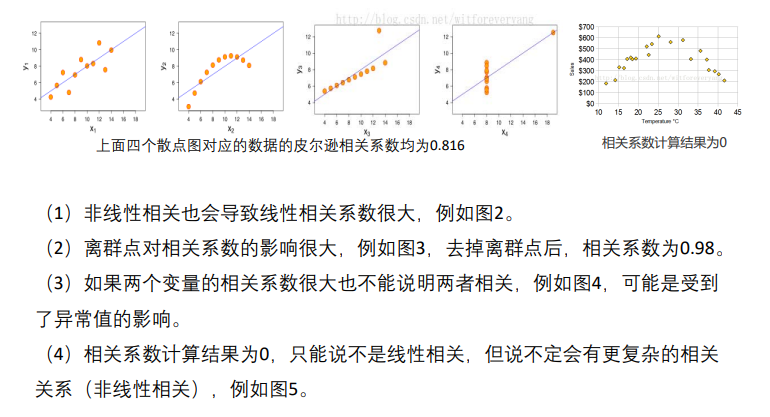

## 描述性统计分析Python实现

In [1]:
import pandas as pd
data = pd.read_excel('八年级女生体测数据.xlsx')
data

身高  体重   肺活量  50米跑  立定跳远  坐位体前屈
0    155  51  1687   9.7   158    9.3
1    158  52  1868   9.3   162    9.6
2    160  59  1958   9.9   178    9.5
3    163  59  1756   9.7   183   10.1
4    165  60  1575   9.0   156   10.4
..   ...  ..   ...   ...   ...    ...
586  164  50  2009   9.7   155    8.5
587  159  41  2538  11.3   165    7.8
588  158  48  3007  12.0   180    6.5
589  155  49  2709  11.0   160    6.4
590  155  51  2708  12.1   165    9.4

[591 rows x 6 columns]

In [2]:
stat = data.describe()
stat

身高          体重          肺活量        50米跑        立定跳远       坐位体前屈
count  591.000000  591.000000   591.000000  591.000000  591.000000  591.000000
mean   156.003384   46.783418  2333.233503   10.792014  166.825719    9.496616
std      7.389410    5.031473   350.436154    1.310873   16.813587    2.938186
min    135.000000   16.000000  1450.000000    7.800000   52.000000    0.500000
25%    151.000000   44.000000  2109.000000    9.800000  156.000000    7.800000
50%    157.000000   47.000000  2391.000000   10.700000  167.000000    9.600000
75%    161.000000   50.000000  2570.000000   11.500000  178.000000   11.600000
max    171.000000   65.000000  3272.000000   15.000000  205.000000   17.500000

In [3]:
stat.loc['mode'] = data.mode().iloc[0,:] # 众数
stat.loc['range'] = stat.loc['max']-stat.loc['min'] #极差
stat.loc['dis'] = stat.loc['75%']-stat.loc['25%'] #四分位数间距
stat.loc['var'] = stat.loc['std']/stat.loc['mean'] # 离散系数
stat.loc['skew'] = stat.skew() # 偏态
stat.loc['kurt'] = stat.kurt() # 峰度

In [4]:
stat

身高          体重          肺活量        50米跑        立定跳远       坐位体前屈
count  591.000000  591.000000   591.000000  591.000000  591.000000  591.000000
mean   156.003384   46.783418  2333.233503   10.792014  166.825719    9.496616
std      7.389410    5.031473   350.436154    1.310873   16.813587    2.938186
min    135.000000   16.000000  1450.000000    7.800000   52.000000    0.500000
25%    151.000000   44.000000  2109.000000    9.800000  156.000000    7.800000
50%    157.000000   47.000000  2391.000000   10.700000  167.000000    9.600000
75%    161.000000   50.000000  2570.000000   11.500000  178.000000   11.600000
max    171.000000   65.000000  3272.000000   15.000000  205.000000   17.500000
mode   160.000000   50.000000  2300.000000   10.900000  160.000000    9.800000
range   36.000000   49.000000  1822.000000    7.200000  153.000000   17.000000
dis     10.000000    6.000000   461.000000    1.700000   22.000000    3.800000
var      0.047367    0.107548     0.150193    0.121467    0.100785    0.309393
skew     2.252805    3.350732    -0.278338    3.459392    2.123435    3.457101
kurt     6.739471   12.323146    -1.452031   12.973398    6.076671   12.960925

## 基于python的Pearson相关系数实现

In [5]:
data.corr() # 计算相关性系数

身高        体重       肺活量      50米跑      立定跳远     坐位体前屈
身高     1.000000  0.066531 -0.217663 -0.192002  0.043973  0.095069
体重     0.066531  1.000000  0.095375  0.068540  0.027943 -0.016089
肺活量   -0.217663  0.095375  1.000000  0.289751  0.024827 -0.074931
50米跑  -0.192002  0.068540  0.289751  1.000000 -0.058681 -0.001876
立定跳远   0.043973  0.027943  0.024827 -0.058681  1.000000 -0.017407
坐位体前屈  0.095069 -0.016089 -0.074931 -0.001876 -0.017407  1.000000

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, '身高'),
  Text(0, 1.5, '体重'),
  Text(0, 2.5, '肺活量'),
  Text(0, 3.5, '50米跑'),
  Text(0, 4.5, '立定跳远'),
  Text(0, 5.5, '坐位体前屈')])

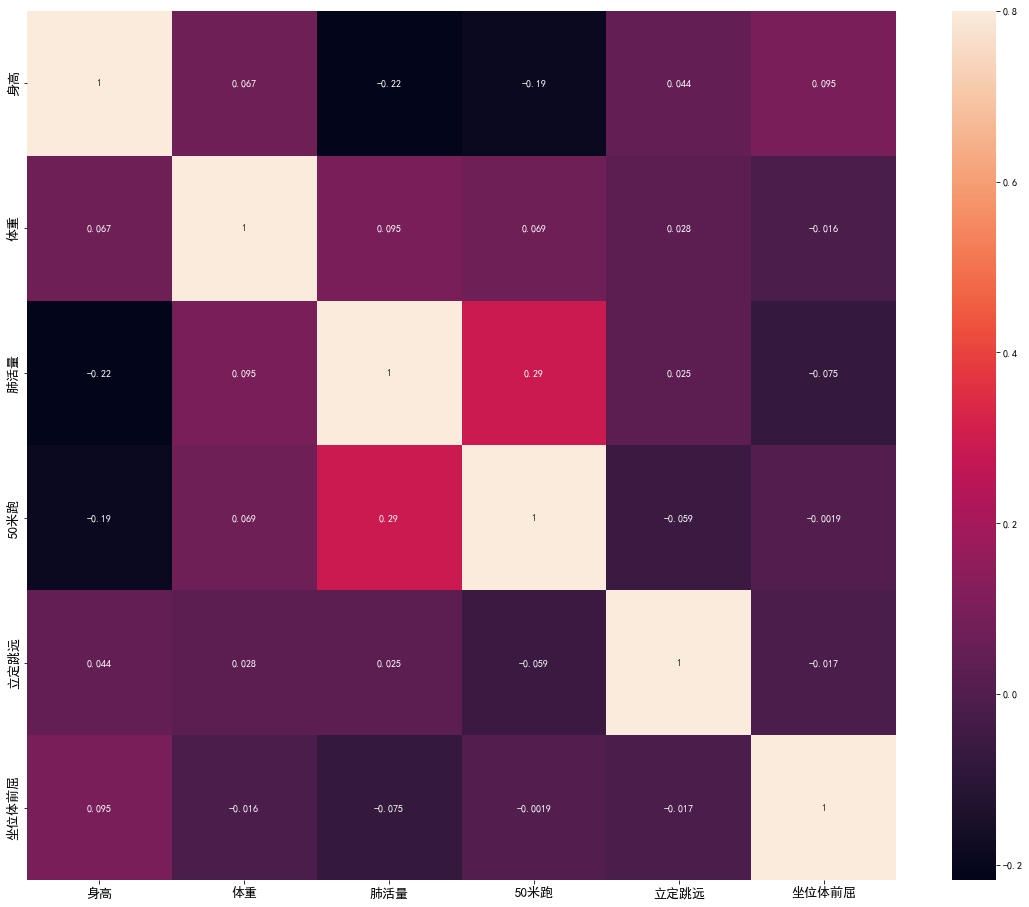

In [6]:
## 相关性系数热力图
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corr()
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] =False #减号unicode编码
ax = plt.subplots(figsize=(20, 16))#调整画布大小
ax = sns.heatmap(corr, vmax=.8, square=True, annot=True)#画热力图   annot=True 表示显示系数
# 设置刻度字体大小
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

## pearson相关系数的假设检验

### 为什么要对相关系数进行假设检验
假如求得的X和Y两个变量的pearson系数为0.3，  
我们要判断这两个变量之间的相关性大小是否显著  
即判断相关系数0.3和0相比是否显著，所以需要进行假设检验  
若0.3与0相比有显著差异，则认为这两个变量的相关性显著  
若0.3与0相比没有显著差异。则认为这两个变量相关性不显著（无相关性）

### 检验步骤
**1. 提出原假设$H_{0}$和备择假设$H_{1}$**  
$H_{0}$：r = 0 , $H_{1}$：r$\neq$0  
**2. 在原假设成立的条件下，利用我们要检验的量构造出一个符合某一分布的统计量**  
+ 统计量相当于我们要检验的量的一个函数，里面不能有其他的随机变量   

+ 对于pearson相关系数r而言，**在满足一定条件下**，我们可以构造统计量： 

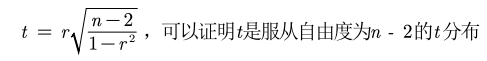    
**3. 将要检验的值带入到这个统计量中，得到一个特定的值（检验值）**  
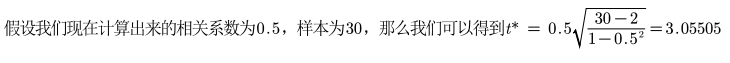  
**4. 根据检验值计算出P值**  
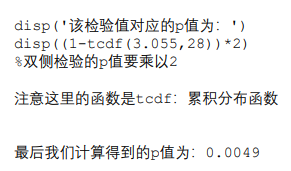  
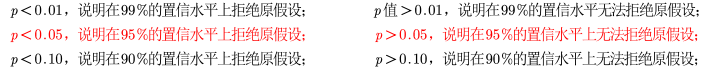  

### pearson相关系数假设检验的条件
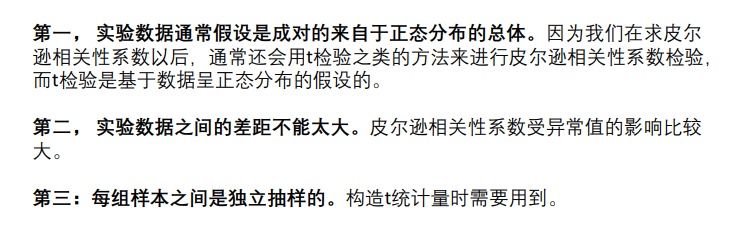

## 正态性检验

### 正态分布JB检验（大样本n>30）
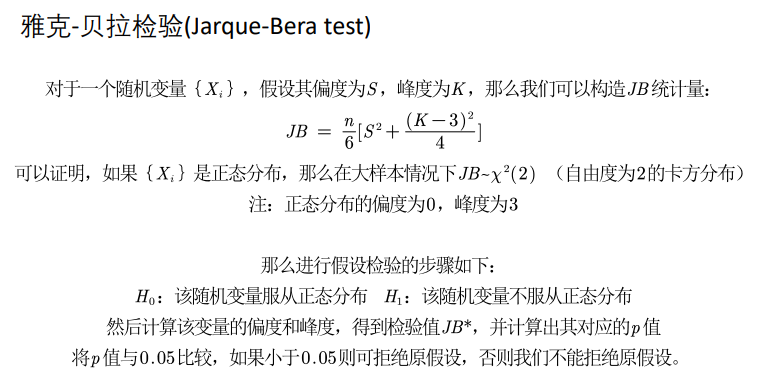
+ **matlab中的用法为：**  
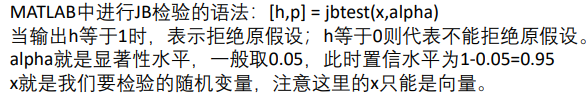

### 小样本检验 Shapiro-wilk检验
### QQ图检验
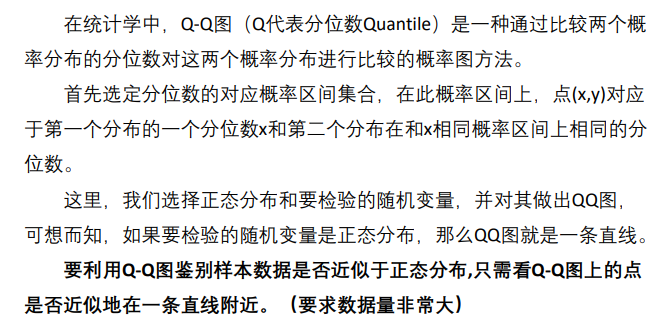
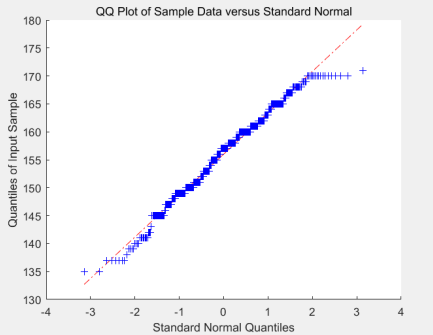

## Spearman相关系数
### 什么时候用spearman相关系数，什么时候用pearson
1. 连续数据，正态分布，线性关系，用pearson相关系数是最恰当，当然用spearman相关系数也可以， 就是效率没有pearson相关系数高。
2. 上述任一条件不满足，就用spearman相关系数，不能用pearson相关系数。
3. 两个定序数据之间也用spearman相关系数，不能用pearson相关系数。
+ ps：斯皮尔曼相关系数也被定义成等级之间的皮尔逊相关系数

### 计算公式
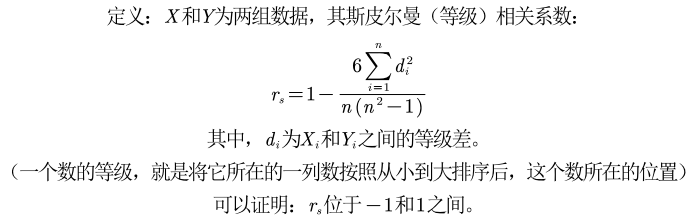
### 示例
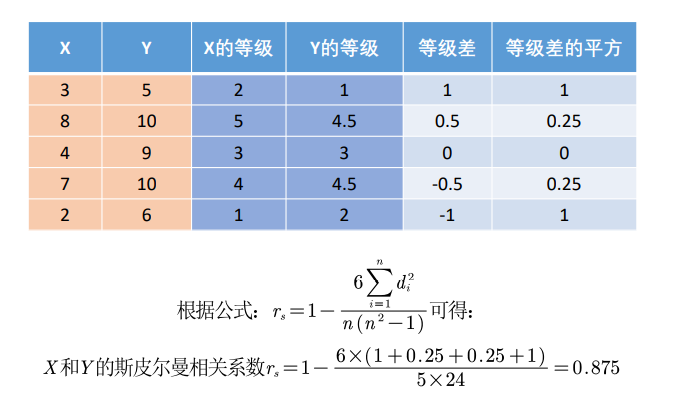

### spearman相关系数的假设检验
**1. 小样本情况，即𝒏$\leq$30时，直接查临界值表即可。**
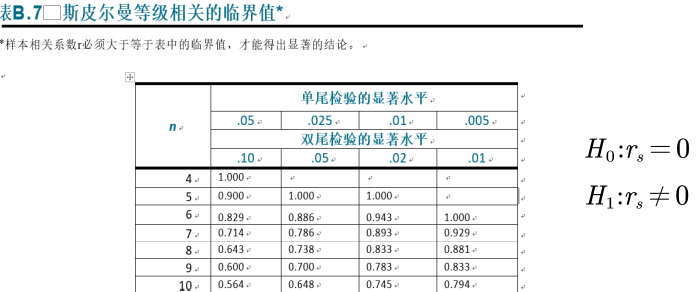
**2. 大样本情况**  
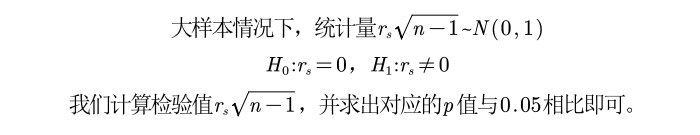

# 多元线性回归分析
回归分析的任务就是，通过研究自变量X和因变量Y的相关关系，尝试去解释Y的形成机制，进而达到通过X去预测Y的目的。
## 回归分析概述
### 相关性$\neq$因果性
通过回归分析，研究相关关系，但无法研究因果性
### Y：因变量
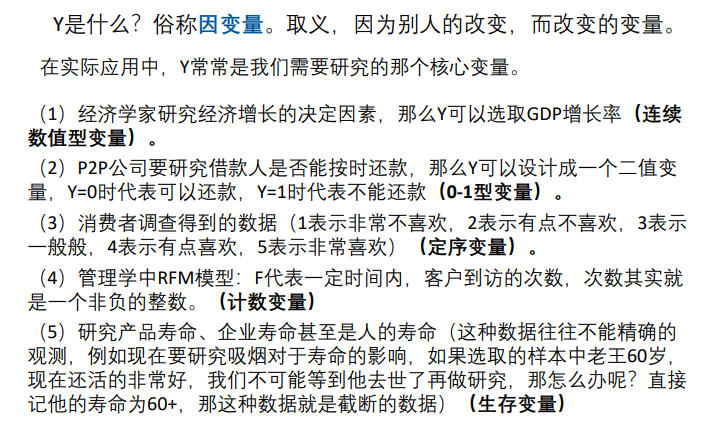
### X：自变量
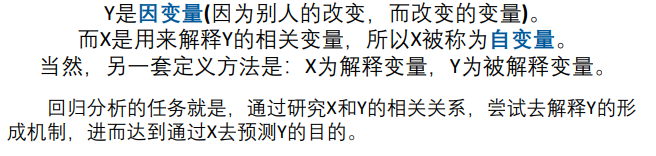
### 回归的任务
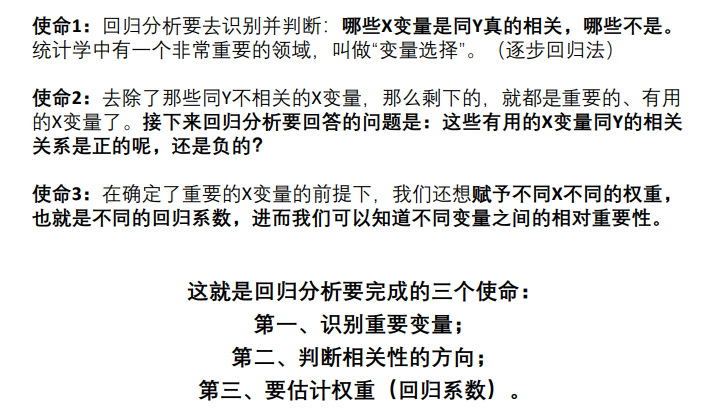
### 回归的分类
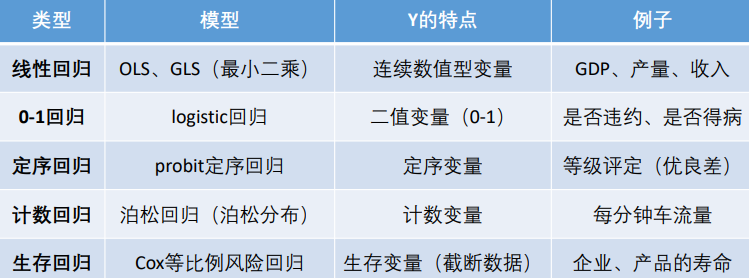
### 数据的分类
1. 横截面数据：在某一时点收集的不同对象的数据。
2. 时间序列数据：对同一对象在不同时间连续观察所取得的数据。
3. 面板数据：横截面数据与时间序列数据综合起来的一种数据资源。
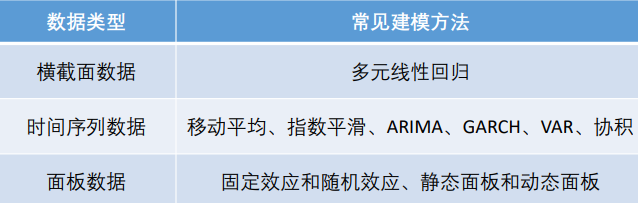

## 一元线性回归
### 一元线性函数拟合
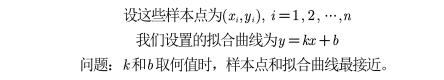
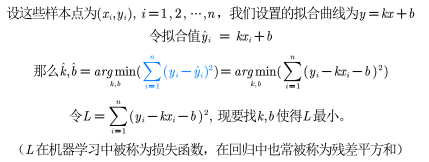
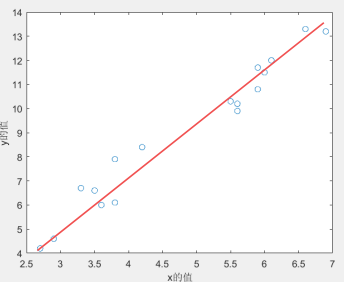
### 一元线性回归模型
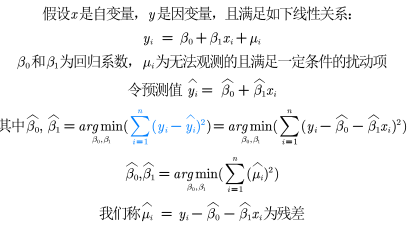
+ ps：一元线性函数拟合和回归特别相像，只是在某些函数上叫法和表达不同

## 对于线性的理解以及内生性问题的探究
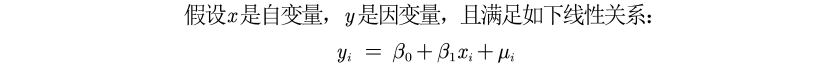
### 线性的理解
 **线性假定并不要求初始模型都如上述公式一样保持着严格的线性关系，自变量与因变量可通过变量替换而转化为线性模型的都可以叫做“线性”**  
例如下列各式都属于线性，经过变量替换可以变为“严格线性”：  
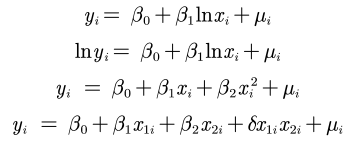
### 回归系数的解释
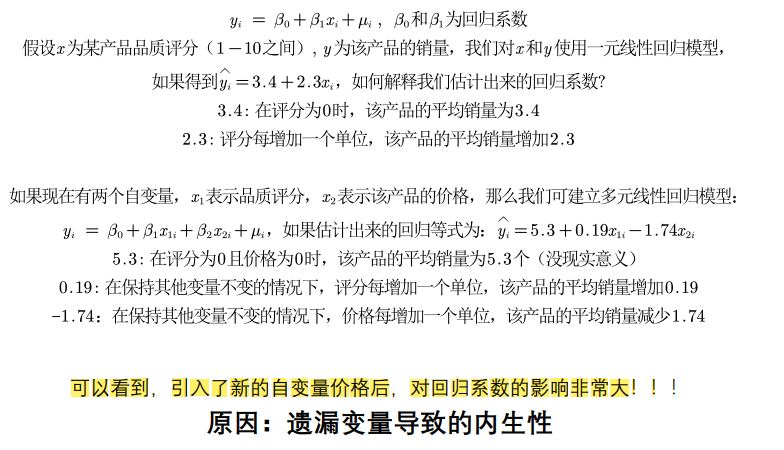
### 内生性的探究
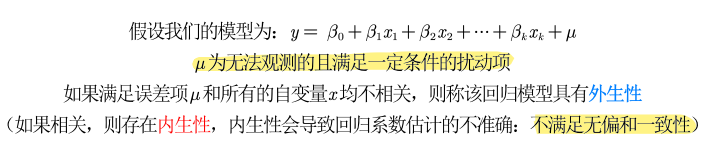
**扰动项包含了所有与y相关，但未添加到回归模型中的变量如果这些变量和我们已经添加的自变量相关，则存在内生性**  
+ **无偏估计：**  
无偏估计的意义是：在多次重复下，它们的平均数接近所估计的参数真值  
+ **一致性：**    
当样本量足够大时，参数的估计值收敛于真实值  

### 内生性的蒙特卡洛模拟python实现
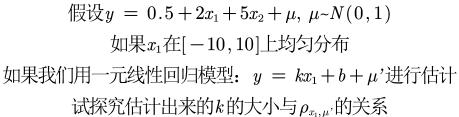

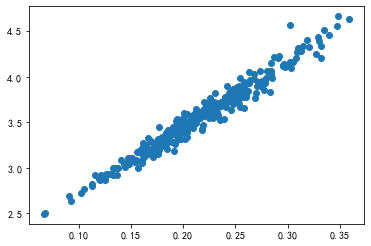

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
steps = 300 # 迭代次数为300次
R = [] # 存储各组数据的相关性系数
K = []
for i in range(steps):
    n = 300 # 样本容量
    x1 = -10 + np.random.random(n)*20
    u1 = np.random.normal(0,1,n) - np.random.random(n)
    x2 = 0.3*x1 + u1
    u = np.random.normal(0,40,n)
    y = 0.5 + 2 * x1 + 5 * x2 + u
    k = (n*sum(x1*y)-sum(x1)*sum(y))/(n*sum(x1*x1)-sum(x1)*sum(x1))
    K.append(k)
    u = 5 * x2 + u
    r = pd.DataFrame(np.array([x1,u]).T).corr()
    R.append(r.iloc[0,1])
plt.scatter(R,K)

### 如何弱化无内生性的要求
无内生性要求所有的解释变量均与扰动项不相关，这个假定太严格了因为解释变量一般很多，且需要全部外生，我们可以通过区分为**核心解释变量**与**控制变量**两类来弱化此条件
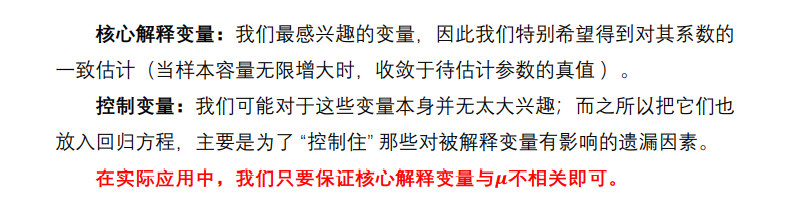


## 四种模型的解释、虚拟变量的设置以及交互项的解释
### 回归系数的解释
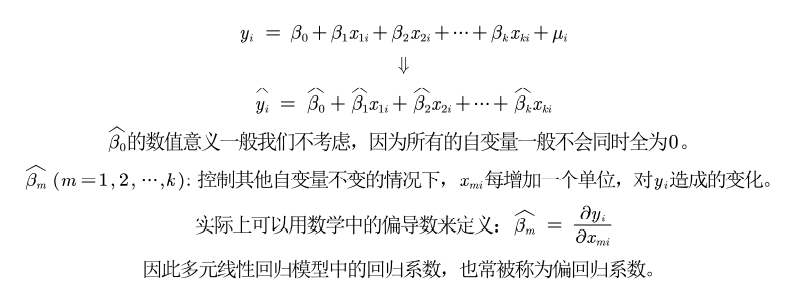
### 什么时候回归模型的变量需要取对数
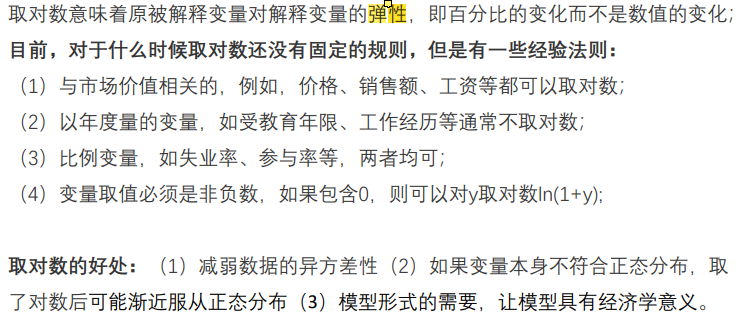
+ **ps：弹性：由数值的变化变成百分比的变化**  
### 四类模型回归系数的解释
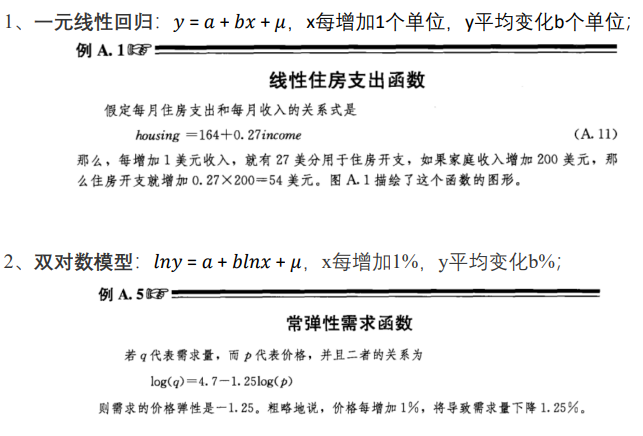
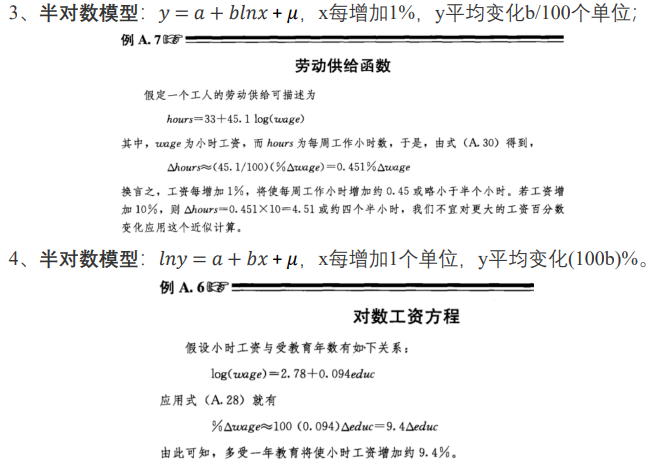

### 虚拟变量X：处理定性数据
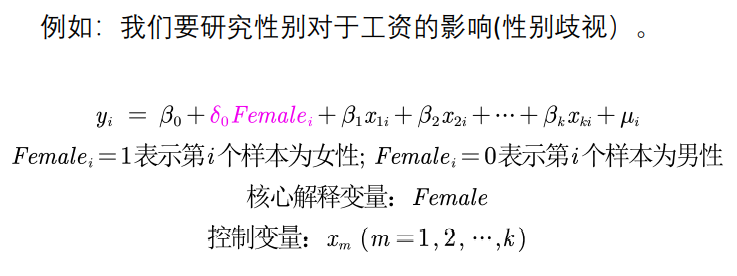
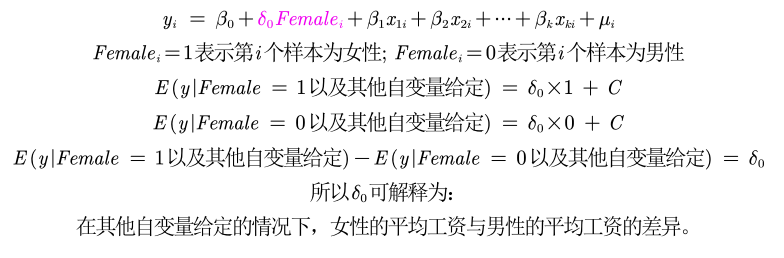
### 多分类的虚拟变量设置
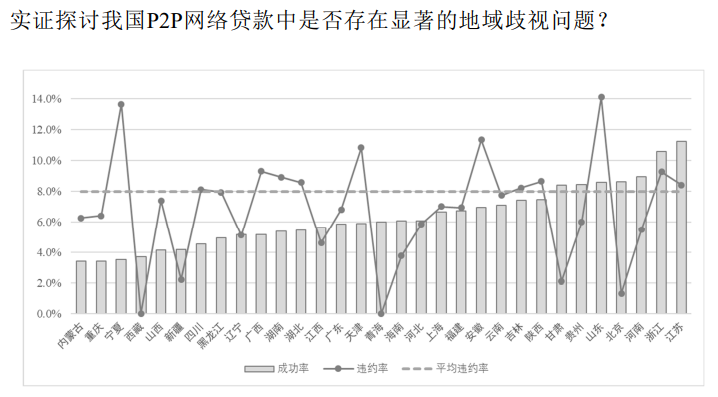
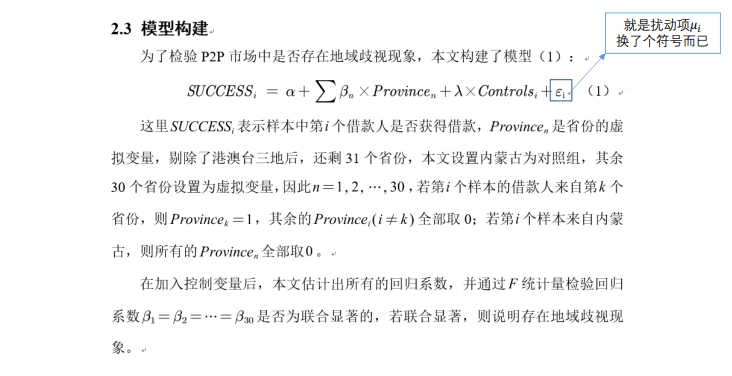
**为了避免完全多重共线性的影响，引入虚拟变量的个数一般是分类数减1。**
### 含有交互项的自变量
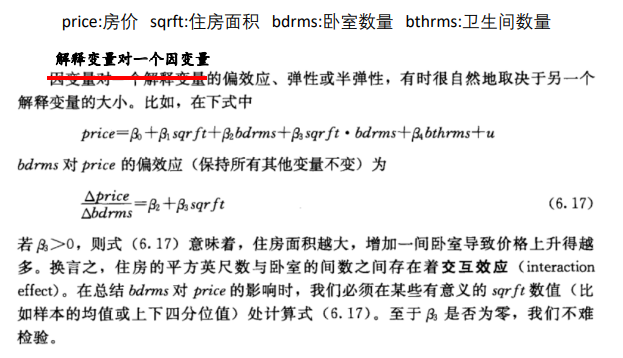

## 异方差
### 异方差的影响
+ **如果扰动项存在异方差**  
1. OLS估计出来的回归系数是无偏、一致的。（无影响）
2. 假设检验无法使用（构造的统计量失效了）。
3. OLS估计量不再是最优线性无偏估计量（BLUE）。
+ **如何解决异方差**  
1. 使用OLS + 稳健的标准误   
统计量：$\frac{\hat\beta}{Se(\hat\beta)} $ 重新构造标准误，使其统计量能够用于假设检验
2. 广义最小二乘估计法GLS  
原理：方差较小的数据包含的信息较多，我们可以给予信息量大的数据更大的权
重（即方差较小的数据给予更大的权重）

### 异方差的检验
**1. BP检验（怀特检验的特例）**
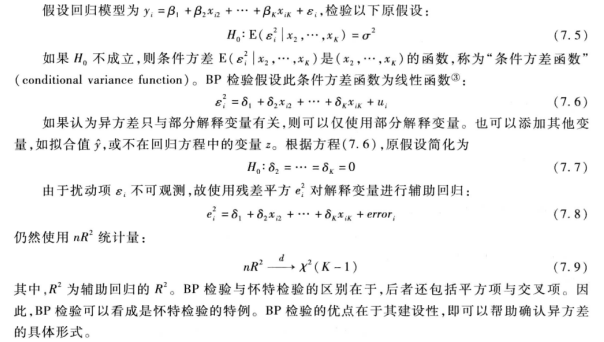
原假设：扰动项不存在异方差  
经计算，若P值小于0.05，说明在95%的置信水平下拒绝原假设，即我们认为扰动项存在异方差。  
**2. 怀特检验**  
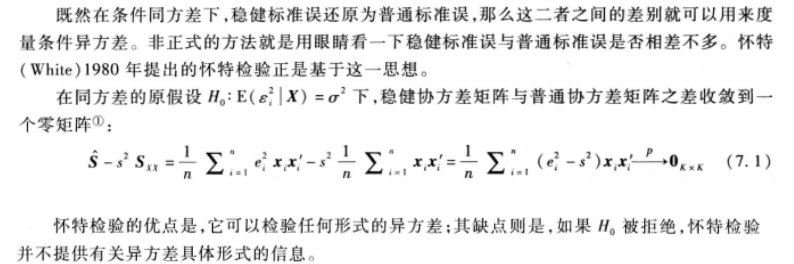

### 解决异方差
**如果经过检验，扰动项存在异方差，需要对标准误进行稳健化处理后再进行参数估计和检验假设**
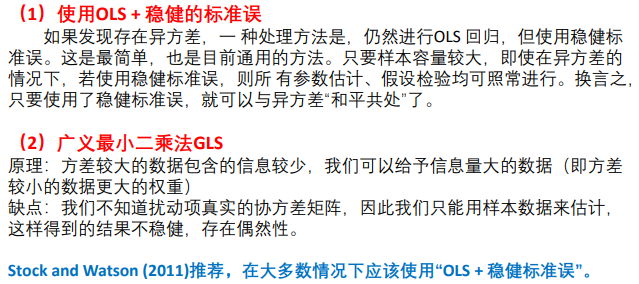

## 多重共线性
+ 多重共线性是指两个自变量间存在相关性
### 多重共线性的影响
1. 影响一：虽然整个回归方程的$R^{2}$较大，F检验也很显著，但是单个系数的t检验却不显著，或者系数的估计值不合理，甚至符号与预期相反，这时候就可能是被多重共线性所影响的
2. 影响二：增减解释变量使得系数估计值发生较大变化，例如最后加入的解释变量与已有的解释变量构成多重共线性  

### 检验多重共线性
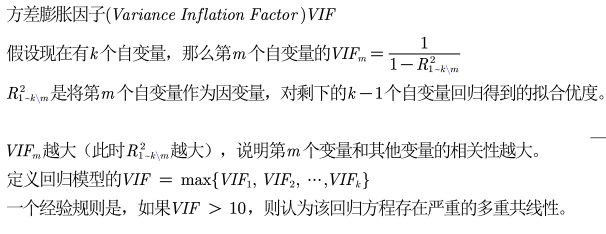
### 多重共线性的处理方法
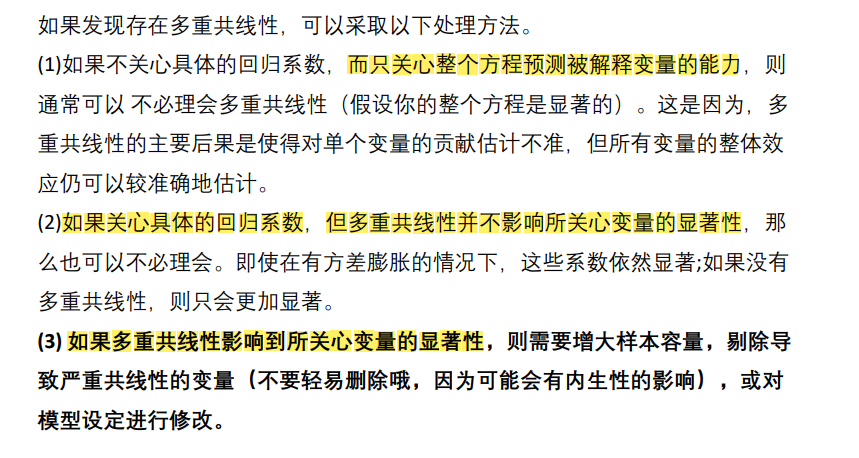

## 逐步回归分析
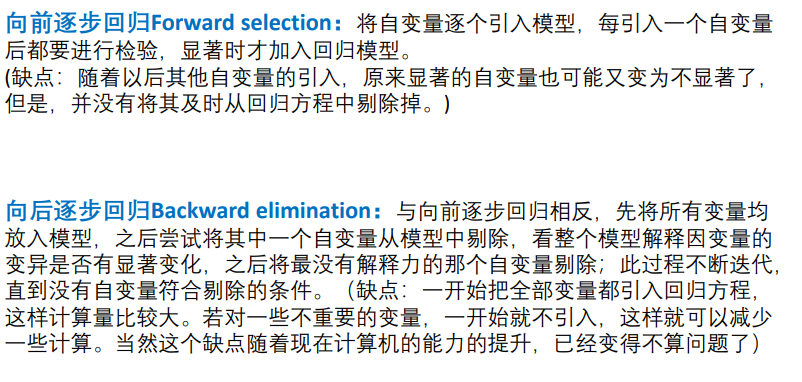
**说明**
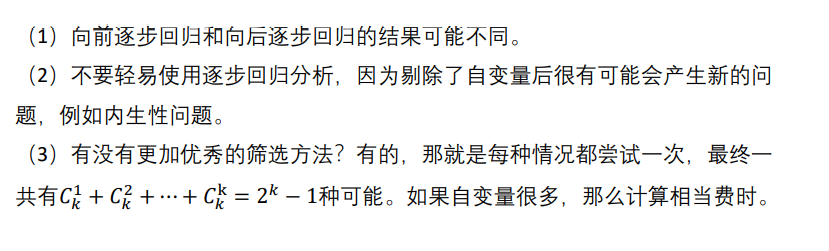

## 回归应用案例 -- 整体流程

### 题目：
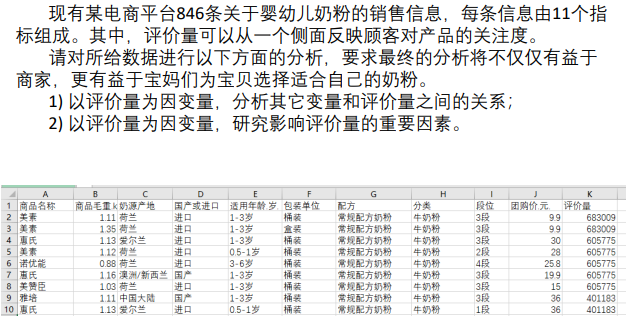

**第一题**
### 第一步：介绍指标的总体情况
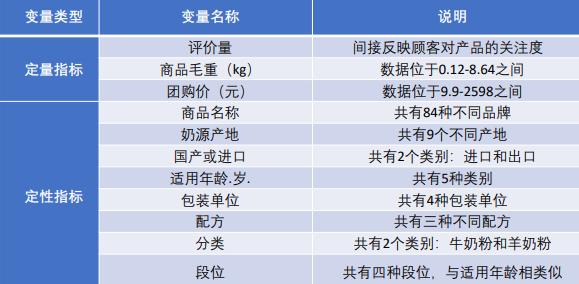
### 第二步：对定量数据进行描述性统计分析
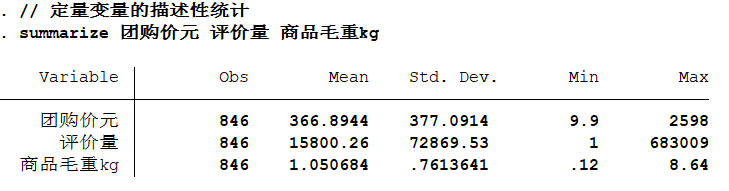
### 第三步：设置虚拟变量，并求定性变量的频数分布
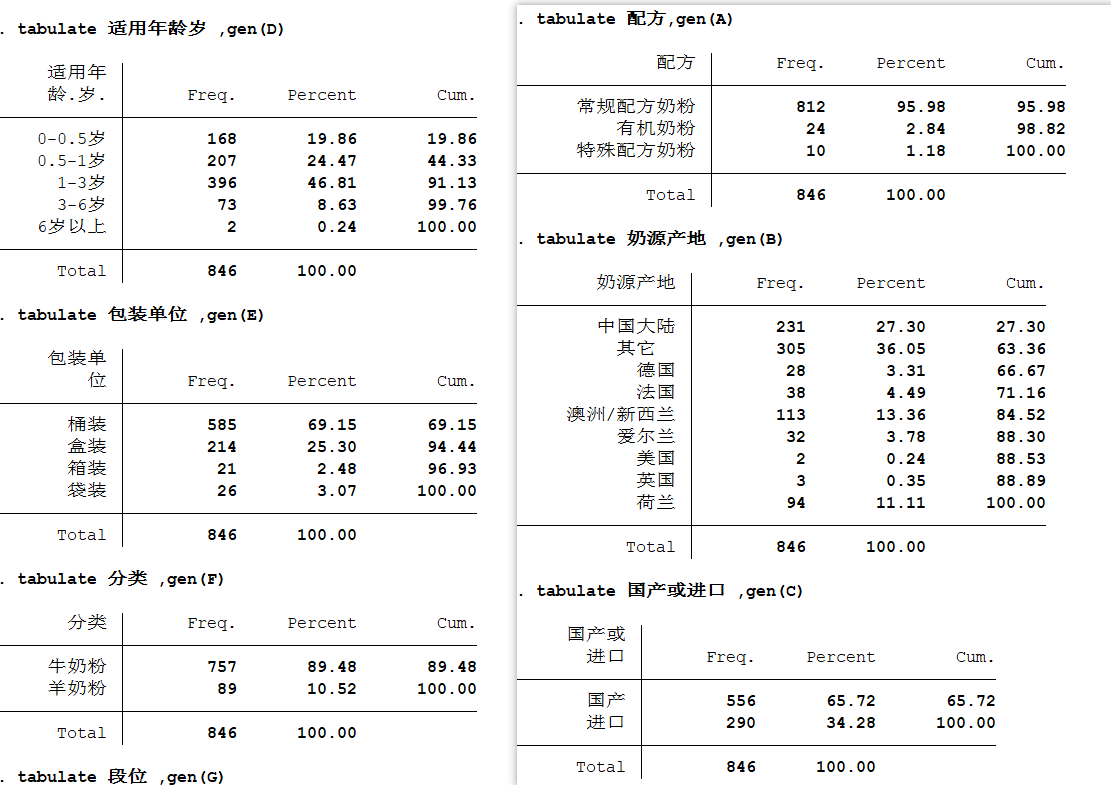
### 第四步：进行回归分析
**1. 使用OLS对定量数据分析**  
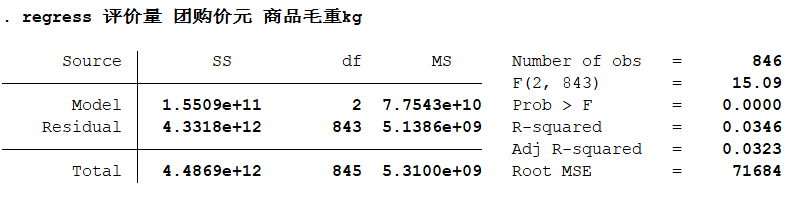
+ 第一个表中：Model：SSR（回归平方和）Reasidual：SSE（误差平方和）Total：SST（总体平方和）  
+ 联合显著性检验：要关注P值是否小于0.05，如果不小于0.05，则不拒绝原假设（$H_{0}$:$\beta_{0}$=$\beta_{1}$=...=$\beta_{k}$=0），则此时回归系数与0无显著性差异，即回归系数都等于0；如果p值小于0.06，则证明回归系数与0有显著性差异，即证明回归系数有意义
+ 在论文中，一般写调整后$R^{2}$  
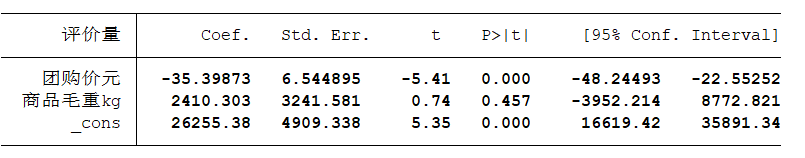
+ coef：点估计：对实际值$\beta$根据统计量估计出来的参数$\beta_{i}$
+ [95% conf.Interval]：区间估计：实际值$\beta$有95%的概率落入此区间（置信区间）
+ 原假设：$H_{0}$:$\beta_{0}$=$\beta_{1}$=...=$\beta_{k}$=0（注意这里是$\beta$而不是$\hat\beta$,因为$\hat\beta$是参数估计值，为coef对应的列，$\beta$为真实值，是我们要假设检验的量）
+ 根据P值，我们发现只有团购价元的回归系数显著不同于0，

**2. 使用OLS对定量、定性数据分析（stata会对完全多重共线性数据进行剔除）**  
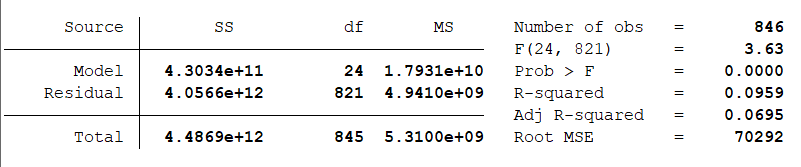
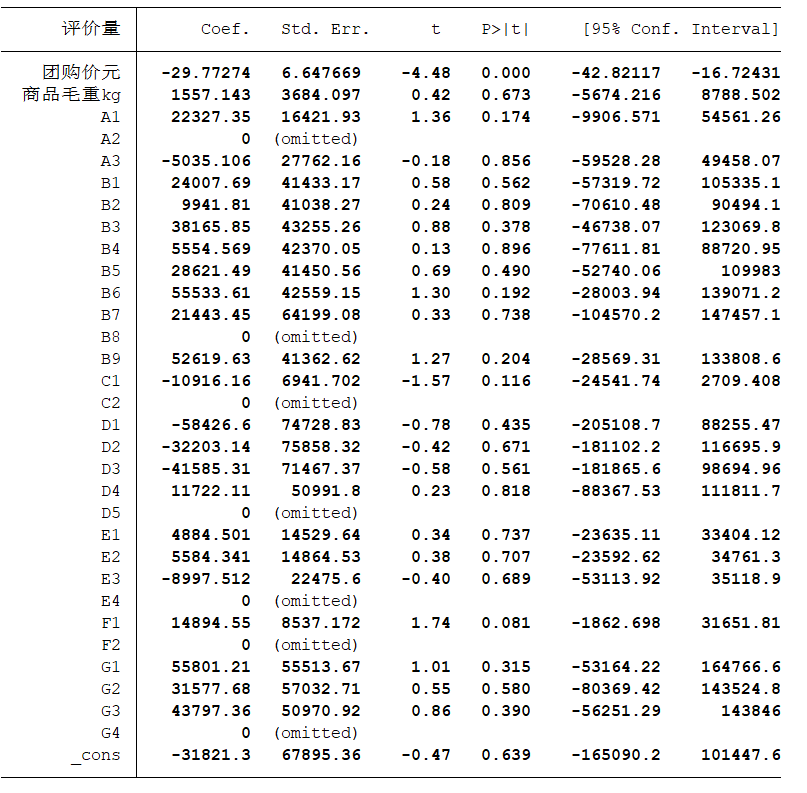
+ 解读：置信度为90%的条件下，团购价元与F1的回归系数显著异于0，在其他自变量不变的情况下，团购价元每增加1个单位，则平均评价量减少29.77；在其他自变量不变的情况下牛奶粉的平均评价量比羊奶粉高出14894.55
### 第五步：异方差检验
1. 可以初步通过画散点图来判断是否存在异方差
+ 拟合值 - SSE之间的关系曲线：可以看出随着拟合值的增大，SSE波动程度变大，即SSE变得不准确，从而导致所构造的统计量失效 -> 假设检验无法使用
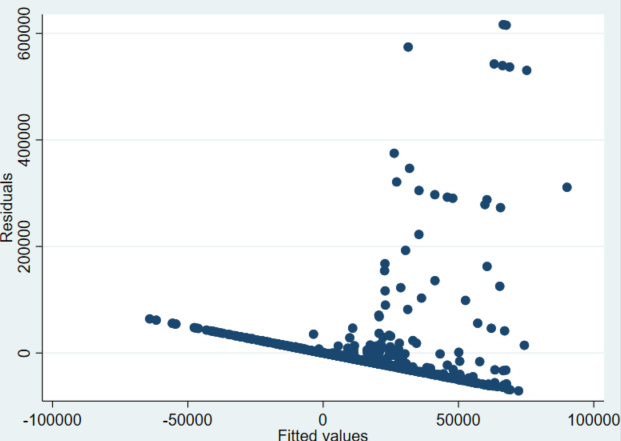  
**2. 怀特检验**  
+ 原假设：不存在异方差
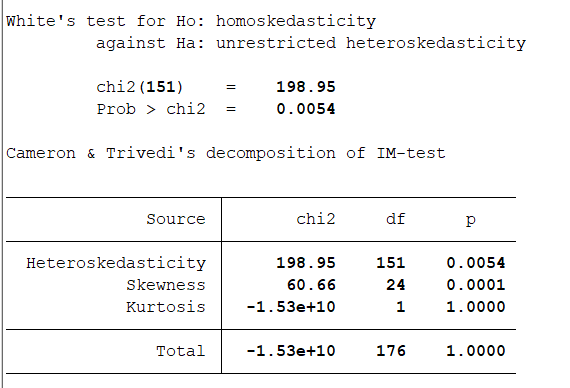
P值小于0.05，拒绝原假设，即存在异方差
### 第六步：剔除异方差对显著性的影响：0LS+稳健的标准误
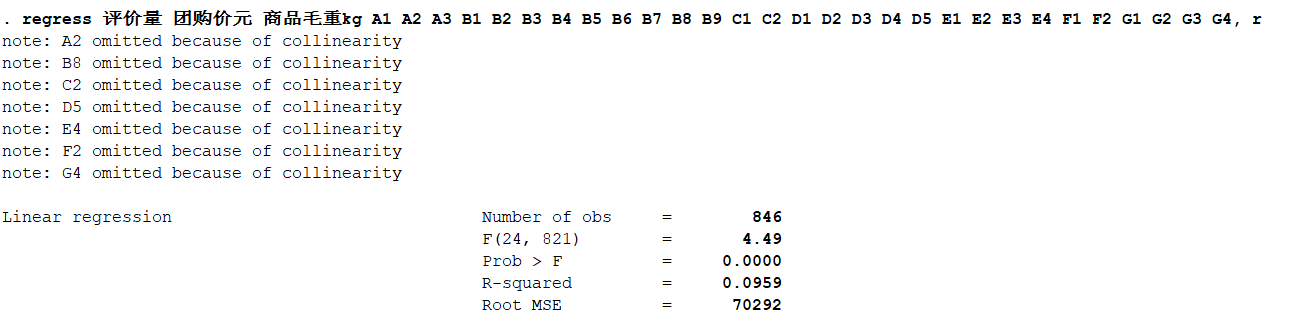
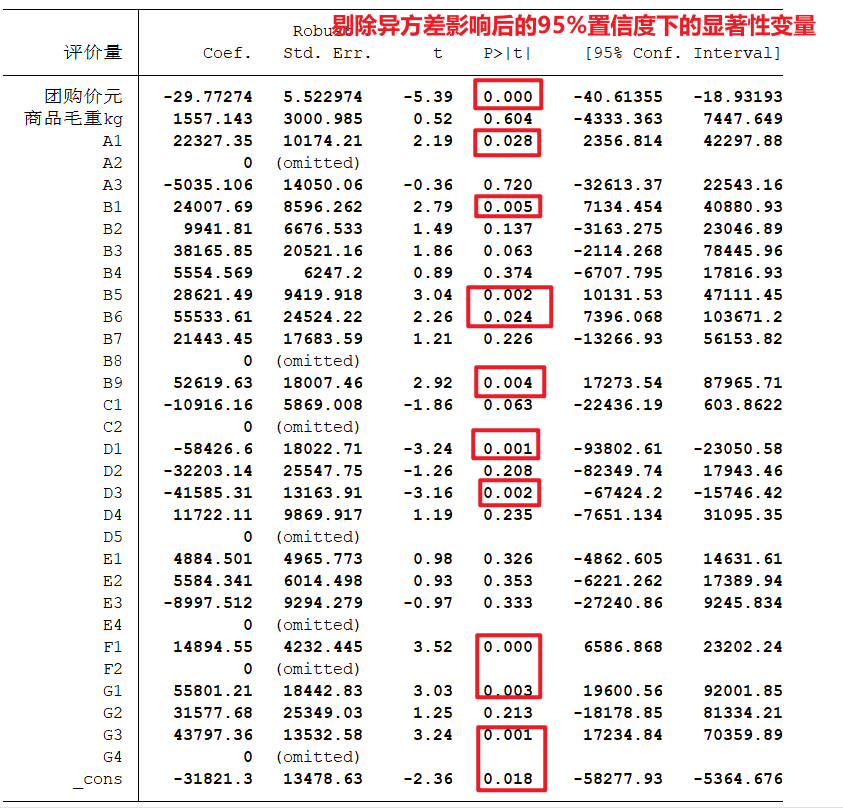
+ 由此可见 剔除异方差的影响后 通过显著性检验的变量明显增多，这说明了，先前的自变量的显著性被异方差所掩盖了
+ 最后直接对显著性变量进行回归系数解释、分析即可
### 第二题：分析标准化回归系数即可

### 多重共线性处理
1. 诊断：方差膨胀因子-> 大于10则证明存在多重共线性
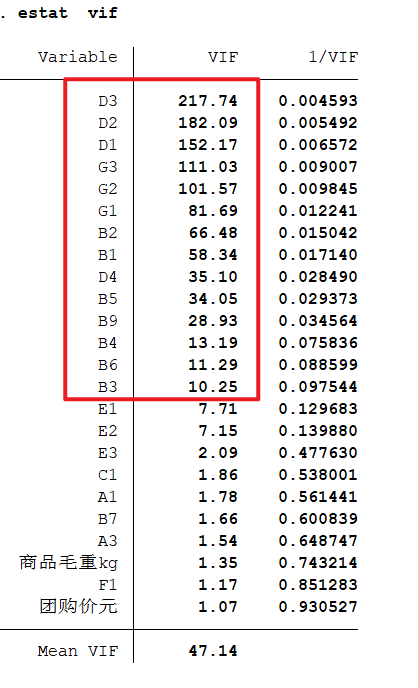
2. 向后多元逐步回归剔除
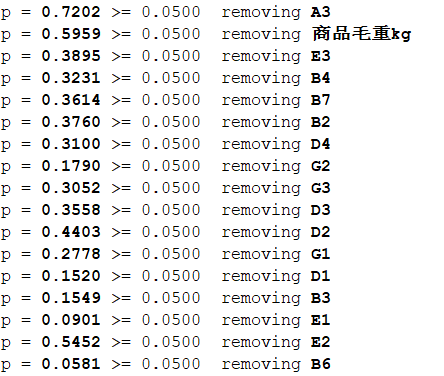
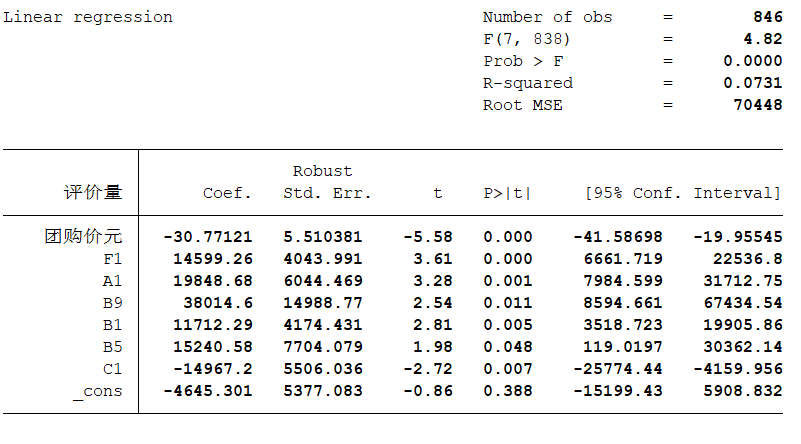

## 补充：拟合优度$R^{2}$比较低怎么办
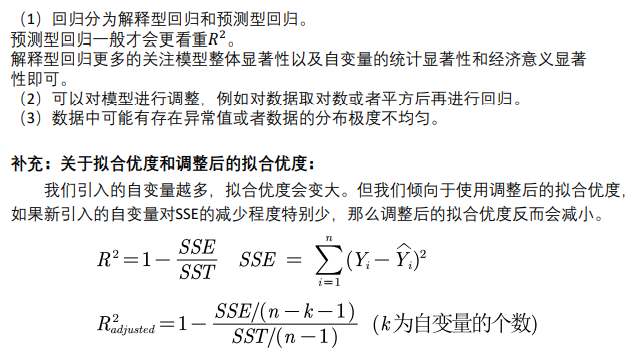

# 岭回归和Lasso回归

+ **岭回归和lasso回归用于处理多重共线性：**    
岭回归和lasso回归在OLS回归模型的损失函数上加上了不同的惩罚项，该惩罚项由回归系数的函数构成，一方面，加入的惩罚项能够识别出模型中不重要的变量，对模型起到简化作用，可以看作逐步回归法的升级版；另一方面，加入的惩罚项能够让模型变得可估计

## 古典回归模型的四个假定
1. 线性假定
2. 严格外生性->保证估计的回归系数无偏且一致
3. 无完全多重共线性 -> 保证能够估计出来
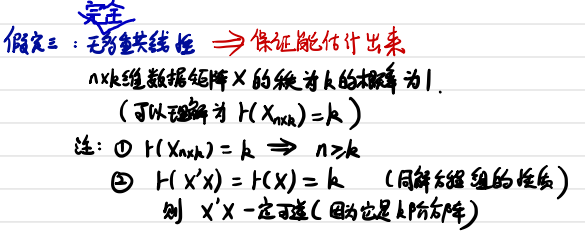
4. 球形扰动项

## 最小二乘法的代数表示
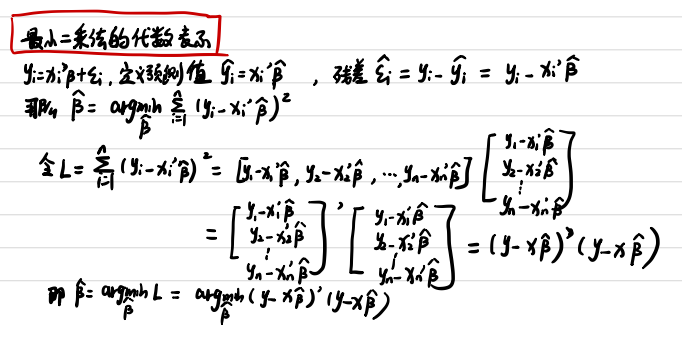
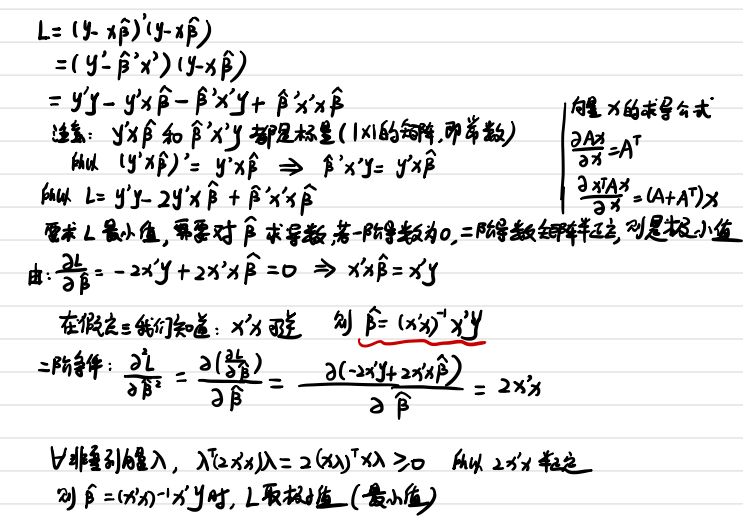

## 岭回归原理
+ 由假定三可知，当自变量间存在多重共线性时，$X^{'}X$不满足列满秩，从而导致$X^{'}X$不可逆，从而导致$\hat\beta$不可估计
+ 岭回归的本质是，在$X^{'}X$中加入$\lambda$I使$X^{'}X$+$\lambda$I可逆，从而使得$\hat\beta$可估计，它就是为了解决因为多重共线性而导致$\hat\beta$不可估计的问题的
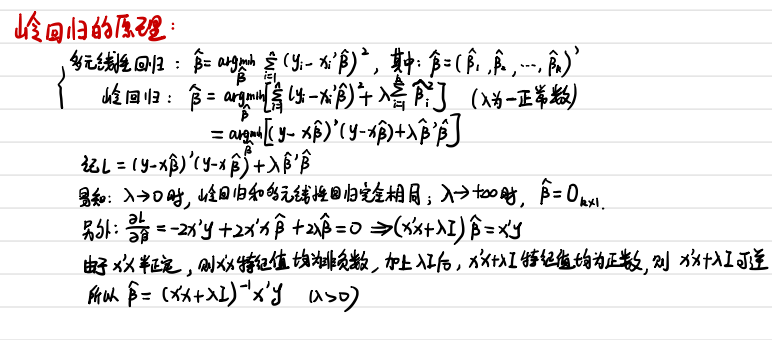  

## 岭回归的优势
相比于多元线性回归，放松了假定三的条件

## 选取$\lambda$的方法
### 岭迹分析
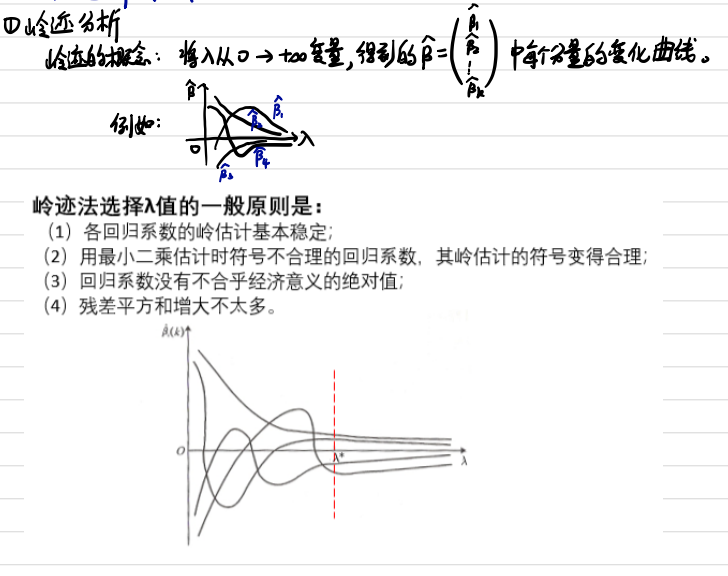
### VIF法
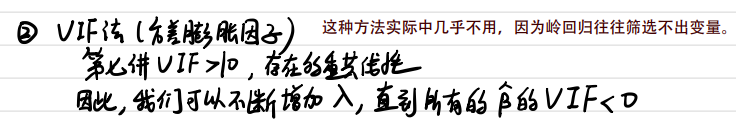
+ VIF<10
### 最小化均方预测误差
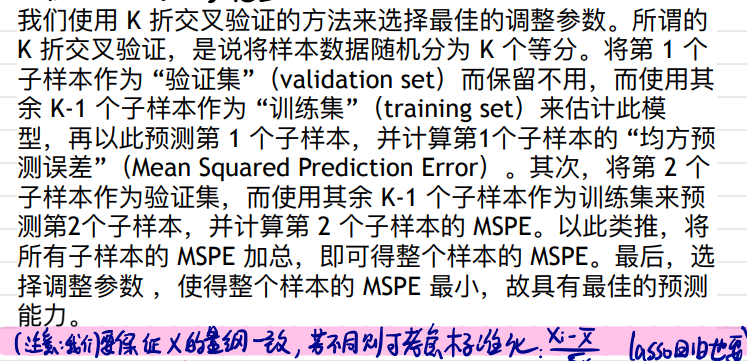

## Lasso回归原理
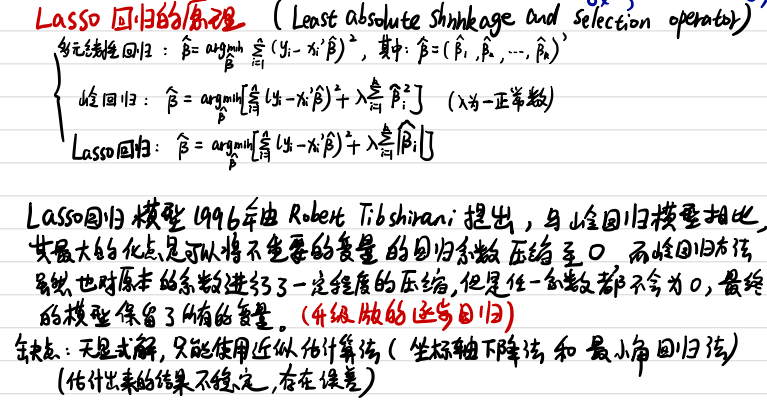
+ 做变量筛选 lasso会比岭回归好

## stata实现lasso回归
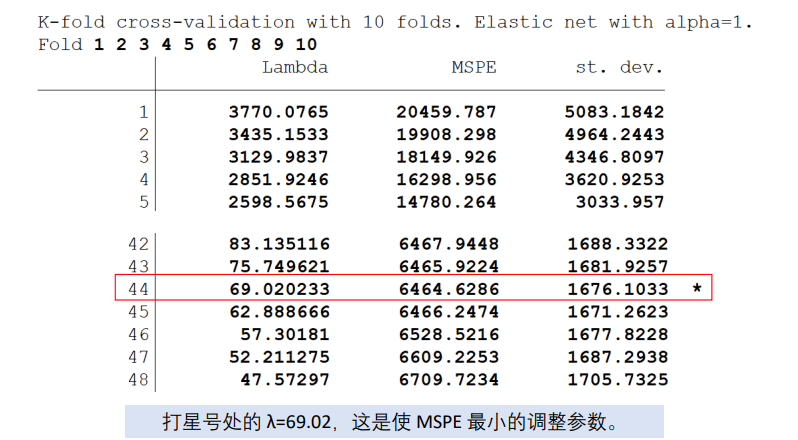
+ 最后一列是标准误
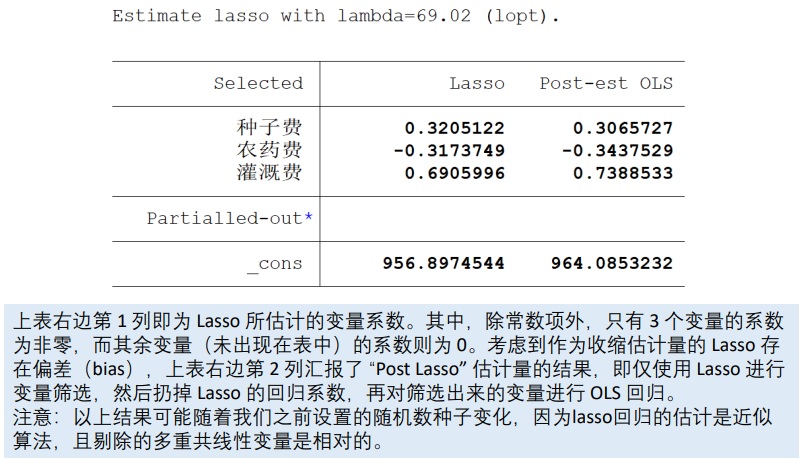

## 何时使用lasso回归
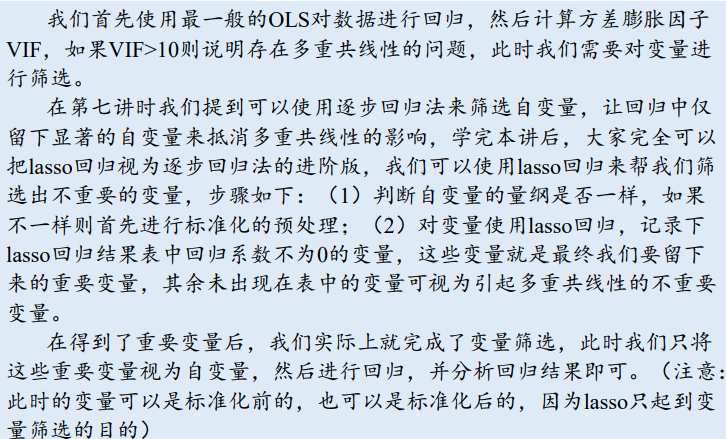